# https://github.com/Aliaa-Kashwa/Wish.com-Product-Rating-Prediction, this link help me in my project

# import libraries

In [103]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder

# read data and get some info about dataset

In [2]:
df_train=pd.read_csv("D:/studies/depi/ottawa/projects/project/train_new.csv")

In [3]:
df_train

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,EUR,10000,0,4.0,2150,0,0,0,...,fantastic_tune,"92 % avis positifs (230,951 notes)",230951,4.311066,53f2db3c104dae6bcae0c271,0,NaN,summer,2020-08,1381
1090,5.00,5,EUR,1000,0,5.0,377,1,0,1,...,zzbllss,"(2,904 notes)",2904,4.422521,592968ba63950d682ca4b195,0,NaN,summer,2020-08,212
1091,9.00,48,EUR,1000,1,4.0,135,0,0,0,...,oiug56465,"78 % avis positifs (6,632 notes)",6632,3.748794,5b6ec2f2838d931d2fbf7a28,0,NaN,summer,2020-08,163
1092,11.00,10,EUR,10000,1,4.0,1479,0,0,0,...,yubenqiang,"83 % avis positifs (5,816 notes)",5816,3.936382,58330d7def56284f7634e5e5,0,NaN,summer,2020-08,674


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   currency_buyer                1094 non-null   object 
 3   units_sold                    1094 non-null   int64  
 4   uses_ad_boosts                1094 non-null   int64  
 5   rating                        1094 non-null   float64
 6   rating_count                  1094 non-null   int64  
 7   badges_count                  1094 non-null   int64  
 8   badge_local_product           1094 non-null   int64  
 9   badge_product_quality         1094 non-null   int64  
 10  badge_fast_shipping           1094 non-null   int64  
 11  tags                          1094 non-null   object 
 12  product_color                 1065 non-null   object 
 13  pro

In [5]:
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [6]:
df_train.isnull().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              745
urgency_text                    745
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating             

removing coulmns which have many values of null

In [7]:
df_train.isnull().sum().sum()

2471

In [8]:
df_train['product_color'].unique()

array(['yellow', 'black', 'white', 'lakeblue', 'apricot', 'brown',
       'winered', 'blue', 'red', 'navyblue', 'green', 'khaki', 'White',
       'white & green', 'multicolor', 'lightpink', 'pink', 'RED',
       'armygreen', 'lightblue', nan, 'coffee', 'grey', 'skyblue',
       'watermelonred', 'pink & black', 'whitefloral', 'purple', 'navy',
       'pink & white', 'rosered', 'orange', 'Black', 'mintgreen',
       'leopardprint', 'gray', 'navy blue', 'star', 'rose', 'lightyellow',
       'camouflage', 'black & yellow', 'whitestripe', 'navyblue & white',
       'black & blue', 'lightred', 'violet', 'gold', 'black & green',
       'white & black', 'burgundy', 'black & white', 'lightgrey',
       'coolblack', 'lightgreen', 'beige', 'darkblue', 'darkgreen',
       'silver', 'wine red', 'Army green', 'pink & blue', 'rainbow',
       'claret', 'floral', 'brown & yellow', 'light green', 'Pink',
       'blue & pink', 'dustypink', 'camel', 'orange-red', 'rosegold',
       'ivory', 'fluorescentg

In [9]:
df_train.columns[df_train.isna().any()].tolist()

['product_color',
 'product_variation_size_id',
 'has_urgency_banner',
 'urgency_text',
 'origin_country',
 'merchant_name',
 'merchant_profile_picture']

In [10]:
df_train.corr().loc['rating']

price                           0.226129
retail_price                    0.086251
units_sold                      0.011729
uses_ad_boosts                 -0.047359
rating                          1.000000
rating_count                    0.025344
badges_count                    0.234001
badge_local_product             0.009850
badge_product_quality           0.273749
badge_fast_shipping             0.042029
product_variation_inventory     0.048443
shipping_option_price           0.202719
shipping_is_express             0.059141
countries_shipped_to            0.024565
inventory_total                -0.116458
has_urgency_banner                   NaN
merchant_rating_count           0.052712
merchant_rating                 0.216270
merchant_has_profile_picture    0.025481
id                              0.058845
Name: rating, dtype: float64

removing has_urgency_banner because correlaction between it and target coulmn is NAN

In [11]:
df_train.nunique()

price                            117
retail_price                      95
currency_buyer                     1
units_sold                        13
uses_ad_boosts                     2
rating                             6
rating_count                     584
badges_count                       4
badge_local_product                2
badge_product_quality              2
badge_fast_shipping                2
tags                             895
product_color                     87
product_variation_size_id         83
product_variation_inventory       47
shipping_option_name              13
shipping_option_price              8
shipping_is_express                2
countries_shipped_to              83
inventory_total                    6
has_urgency_banner                 1
urgency_text                       2
origin_country                     5
merchant_title                   747
merchant_name                    746
merchant_info_subtitle           808
merchant_rating_count            718
m

In [12]:
df_train.columns[df_train.nunique()==1].tolist()

['currency_buyer', 'has_urgency_banner', 'theme', 'crawl_month']

removing this coulmns because this coulmns has one value so this coulmns not effect on my models

# count value some coulmns

In [13]:
df_train['inventory_total'].value_counts()

50    1089
37       1
36       1
9        1
2        1
1        1
Name: inventory_total, dtype: int64

In [14]:
df_train['shipping_option_name'].value_counts()

Livraison standard         1047
Standard Shipping            16
Envio Padrão                  6
الشحن القياسي                 4
Expediere Standard            4
Livraison Express             3
Standardversand               3
Envío normal                  3
Standart Gönderi              2
Standardowa wysyłka           2
Стандартная доставка          2
Spedizione standard           1
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Name: shipping_option_name, dtype: int64

In [15]:
df_train['shipping_is_express'].value_counts()

0    1091
1       3
Name: shipping_is_express, dtype: int64

In [16]:
df_train['origin_country'].value_counts()

CN    1054
US      22
VE       3
SG       2
GB       1
Name: origin_country, dtype: int64

removing this coulmns will affect on my model negatively because most of value belong to one element in coulmns

I extract percentage from merchant_info_subtitle

In [17]:
def get_Percentage(x): 
    match = re.findall(r'\d+%', str(x))
    if match is None:
        return None
    else:
        for i in range(0,len(match)):
            return float(str(match[i]).rstrip("%"))

In [18]:
df_train['merchant_info_subtitle'] = df_train['merchant_info_subtitle'].str.replace(' ', '')
df_train['merchant_Percentage'] = df_train['merchant_info_subtitle'].apply(get_Percentage)

In [19]:
df_train

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id,merchant_Percentage
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,"88%avispositifs(66,644notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272,88.0
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,"91%avispositifs(25,752notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515,91.0
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,"83%avispositifs(3,897notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940,83.0
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,"87%avispositifs(7,497notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309,87.0
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,91%avispositifs(173notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,EUR,10000,0,4.0,2150,0,0,0,...,"92%avispositifs(230,951notes)",230951,4.311066,53f2db3c104dae6bcae0c271,0,NaN,summer,2020-08,1381,92.0
1090,5.00,5,EUR,1000,0,5.0,377,1,0,1,...,"(2,904notes)",2904,4.422521,592968ba63950d682ca4b195,0,NaN,summer,2020-08,212,NaN
1091,9.00,48,EUR,1000,1,4.0,135,0,0,0,...,"78%avispositifs(6,632notes)",6632,3.748794,5b6ec2f2838d931d2fbf7a28,0,NaN,summer,2020-08,163,78.0
1092,11.00,10,EUR,10000,1,4.0,1479,0,0,0,...,"83%avispositifs(5,816notes)",5816,3.936382,58330d7def56284f7634e5e5,0,NaN,summer,2020-08,674,83.0


# value count of target coulmn

In [20]:
df_train['rating'].value_counts()

4.0    774
5.0    170
3.0    135
2.0     12
1.0      2
6.0      1
Name: rating, dtype: int64

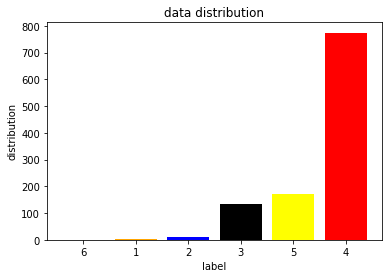

In [21]:
x_train=np.arange(1,7)
x_train=x_train[::-1]
c = ['red', 'yellow', 'black', 'blue', 'orange','green']
plt.bar(x_train, df_train['rating'].value_counts(),color=c)
plt.xticks(x_train,['4','5','3','2','1','6'])
plt.xlabel("label")
plt.ylabel("distribution")
plt.title('data distribution')
plt.show()

# Drop some columns after data preprocessing and feature extraction

In [22]:
df_train_new=df_train.drop(['has_urgency_banner','urgency_text','merchant_profile_picture','currency_buyer', 'has_urgency_banner', 
                            'theme', 'crawl_month','merchant_title','merchant_name','merchant_id','id','merchant_info_subtitle',
                            'inventory_total','shipping_option_name','shipping_is_express','origin_country'],axis=1)

In [23]:
df_train_new

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,countries_shipped_to,merchant_rating_count,merchant_rating,merchant_has_profile_picture,merchant_Percentage
0,8.00,7,10000,1,4.0,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,M,50,3,30,66644,4.137582,1,88.0
1,8.00,7,1000,0,4.0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,L,50,3,37,25752,4.256873,0,91.0
2,6.00,34,100,0,4.0,10,0,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,L,50,2,41,3897,3.928920,0,83.0
3,4.67,4,100,1,3.0,82,0,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,XS,5,1,25,7497,4.079365,0,87.0
4,8.00,11,1000,0,4.0,127,0,0,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,S,50,3,15,173,4.306358,0,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,4.0,2150,0,0,0,0,"corset top,Fashion,crop top,camisole,knittop,T...",red,S,50,1,41,230951,4.311066,0,92.0
1090,5.00,5,1000,0,5.0,377,1,0,1,0,"Blues,Summer,luggagesticker,Bicycle,cute,fresh...",NaN,H01,31,2,35,2904,4.422521,0,NaN
1091,9.00,48,1000,1,4.0,135,0,0,0,0,"Summer,Vest,Fashion,Tank,camisole,Halter,Beaut...",purple,M,50,3,25,6632,3.748794,0,78.0
1092,11.00,10,10000,1,4.0,1479,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,letter pri...",black,M,50,2,45,5816,3.936382,0,83.0


In [24]:
df_train_new.isnull().sum()

price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_price             0
countries_shipped_to              0
merchant_rating_count             0
merchant_rating                   0
merchant_has_profile_picture      0
merchant_Percentage             211
dtype: int64

In [25]:
df_train_new.isnull().sum().sum()

252

# fill nan

In [26]:
#replace nan with mode value
df_train_new['product_color'].fillna((df_train_new['product_color'].mode()[0]), inplace=True)

In [27]:
#replace nan with mode value
df_train_new['product_variation_size_id'].fillna((df_train_new['product_variation_size_id'].mode()[0]), inplace=True)

In [28]:
#replace nan with mode value
df_train_new['merchant_Percentage'].fillna((df_train_new['merchant_Percentage'].mode()[0]), inplace=True)

In [29]:
#check number of nan
df_train_new.isnull().sum().sum()

0

In [30]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   units_sold                    1094 non-null   int64  
 3   uses_ad_boosts                1094 non-null   int64  
 4   rating                        1094 non-null   float64
 5   rating_count                  1094 non-null   int64  
 6   badges_count                  1094 non-null   int64  
 7   badge_local_product           1094 non-null   int64  
 8   badge_product_quality         1094 non-null   int64  
 9   badge_fast_shipping           1094 non-null   int64  
 10  tags                          1094 non-null   object 
 11  product_color                 1094 non-null   object 
 12  product_variation_size_id     1094 non-null   object 
 13  pro

# tags

In [44]:
df_train_new['tags'].unique()

array(["Summer,soildcolor,Plus Size,Tank,camisole,Tops,Loose,tank top,Women's Fashion,Fashion,sleeveless tops,sleeveless,Women,Lace,Casual,summerampspring",
       "bathing suit,Plus Size,bikini set,sexy swimsuit,sexy bikini,paddedfringetasselbikinibeachswimwear,Swimwear,padded,Women's Fashion,Fashion,sexy,fashiondesign,high waist,Tassels,Waist,beach wear,Swimsuit,Bikini,splitswimsuit,Women,Monokini Swimsuits,Swimming",
       "Summer,Vest,momshirt,Get,summer t-shirts,funnytop,tank top,Tops,Women's Fashion,Fashion,yoga top,Casual,Women,blouse,Funny,Tank,Shirt,graphic tee,sleevelessblouse,sportsamprecreation,gymwear,sleeveless,casualblouse",
       "Summer,Shorts,pants,Beach,Plus Size,beachpant,Short pants,pantsformen,Men's Fashion,trousers,Men's pants,Men Shorts,mens Trousers,Fashion,Casual,Men",
       "Summer,Floral print,women dresses,fashion dress,Dress,beach dress,Floral dress,Print,slingdre,Sleeveless dress,Lace Up,V-neck,print dress,Floral,sleeveless,V-neck Dresses,Beach,Women's

In [45]:
df_train_new['tags'].value_counts()

Summer,Fashion,Necks,Skirts,Dress,Loose,Women's Fashion,Round neck,beach dress,sleeveless,Beach,Casual,Women                                                                                                                                                 13
Summer,Sling,Dresses,Dress,V-neck,Casual,Pocket,Women's Fashion,Sleeveless dress,women dress,Floral,sleeveless,Women,loose dress,Pleated,casual dress                                                                                                         7
Summer,Leggings,Fashion,high waist,pants,slim,Women's Fashion,trousers,Green,Army,Women                                                                                                                                                                       6
Summer,Women Rompers,Plus Size,women long pants,linenjumpsuit,pants,Overalls,Loose,plussizejumpsuit,Women's Fashion,strappant,Long pants,Jumpsuits & Rompers,rompers womens jumpsuit,Vintage,Women,women Jumpsuit,Casual,jumpsuit       

In [46]:
#label encoding with catogrical data
label_ecode_tags=LabelEncoder()
df_train_new['tags']=label_ecode_tags.fit_transform(df_train_new['tags'])

In [47]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   units_sold                    1094 non-null   int64  
 3   uses_ad_boosts                1094 non-null   int64  
 4   rating                        1094 non-null   float64
 5   rating_count                  1094 non-null   int64  
 6   badges_count                  1094 non-null   int64  
 7   badge_local_product           1094 non-null   int64  
 8   badge_product_quality         1094 non-null   int64  
 9   badge_fast_shipping           1094 non-null   int64  
 10  tags                          1094 non-null   int32  
 11  product_color                 1094 non-null   object 
 12  product_variation_size_id     1094 non-null   int32  
 13  pro

# product_color

In [48]:
df_train_new['product_color'].unique()

array(['yellow', 'black', 'white', 'lakeblue', 'apricot', 'brown',
       'winered', 'blue', 'red', 'navyblue', 'green', 'khaki', 'White',
       'white & green', 'multicolor', 'lightpink', 'pink', 'RED',
       'armygreen', 'lightblue', 'coffee', 'grey', 'skyblue',
       'watermelonred', 'pink & black', 'whitefloral', 'purple', 'navy',
       'pink & white', 'rosered', 'orange', 'Black', 'mintgreen',
       'leopardprint', 'gray', 'navy blue', 'star', 'rose', 'lightyellow',
       'camouflage', 'black & yellow', 'whitestripe', 'navyblue & white',
       'black & blue', 'lightred', 'violet', 'gold', 'black & green',
       'white & black', 'burgundy', 'black & white', 'lightgrey',
       'coolblack', 'lightgreen', 'beige', 'darkblue', 'darkgreen',
       'silver', 'wine red', 'Army green', 'pink & blue', 'rainbow',
       'claret', 'floral', 'brown & yellow', 'light green', 'Pink',
       'blue & pink', 'dustypink', 'camel', 'orange-red', 'rosegold',
       'ivory', 'fluorescentgreen'

In [49]:
df_train_new['product_color'].replace('grey','gray', inplace=True)
df_train_new['product_color'].replace('White','white', inplace=True)
df_train_new['product_color'].replace('RED','red', inplace=True)
df_train_new['product_color'].replace('Black','black', inplace=True)
df_train_new['product_color'].replace('Blue','blue', inplace=True)

In [50]:
df_train_new['product_color'].unique()

array(['yellow', 'black', 'white', 'lakeblue', 'apricot', 'brown',
       'winered', 'blue', 'red', 'navyblue', 'green', 'khaki',
       'white & green', 'multicolor', 'lightpink', 'pink', 'armygreen',
       'lightblue', 'coffee', 'gray', 'skyblue', 'watermelonred',
       'pink & black', 'whitefloral', 'purple', 'navy', 'pink & white',
       'rosered', 'orange', 'mintgreen', 'leopardprint', 'navy blue',
       'star', 'rose', 'lightyellow', 'camouflage', 'black & yellow',
       'whitestripe', 'navyblue & white', 'black & blue', 'lightred',
       'violet', 'gold', 'black & green', 'white & black', 'burgundy',
       'black & white', 'lightgrey', 'coolblack', 'lightgreen', 'beige',
       'darkblue', 'darkgreen', 'silver', 'wine red', 'Army green',
       'pink & blue', 'rainbow', 'claret', 'floral', 'brown & yellow',
       'light green', 'Pink', 'blue & pink', 'dustypink', 'camel',
       'orange-red', 'rosegold', 'ivory', 'fluorescentgreen',
       'winered & yellow', 'offwhite',

In [51]:
df_train_new['product_color'].value_counts()

black             251
white             176
blue               78
yellow             69
pink               68
                 ... 
nude                1
rainbow             1
brown & yellow      1
blue & pink         1
pink & grey         1
Name: product_color, Length: 82, dtype: int64

In [52]:
#label encoding with catogrical data
label_ecode_product_color=LabelEncoder()
df_train_new['product_color']=label_ecode_product_color.fit_transform(df_train_new['product_color'])

In [53]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   units_sold                    1094 non-null   int64  
 3   uses_ad_boosts                1094 non-null   int64  
 4   rating                        1094 non-null   float64
 5   rating_count                  1094 non-null   int64  
 6   badges_count                  1094 non-null   int64  
 7   badge_local_product           1094 non-null   int64  
 8   badge_product_quality         1094 non-null   int64  
 9   badge_fast_shipping           1094 non-null   int64  
 10  tags                          1094 non-null   int32  
 11  product_color                 1094 non-null   int32  
 12  product_variation_size_id     1094 non-null   int32  
 13  pro

# product_variation_size_id

In [31]:
df_train_new['product_variation_size_id'].unique()

array(['M', 'L', 'XS', 'S', 'XL', '26(Waist 72cm 28inch)', 'S.',
       'S(bust 88cm)', 'XXS', 's', '29', 'choose a size', 'XXXS',
       'Base Coat', 'Size M', 'XXL', 'M.', 'XS.',
       '100 x 100cm(39.3 x 39.3inch)', '2pcs', '4XL', '1', '25-S',
       'Size-XXS', '5PAIRS', '35', 'Pack of 1', 'Size S', 'Size-S', '6XL',
       '25', 'S/M(child)', '60', 'Size-XS', 'S (waist58-62cm)',
       'SIZE XXS', '10 ml', 'X   L', 'Women Size 36', '04-3XL',
       'Size -XXS', '1 pc.', 'Floating Chair for Kid', 'S Pink', '34',
       'US-S', 'Size XXS', 'pants-S', 'XXXXL', 'SIZE-XXS', 'SIZE XS',
       '1pc', 'Size S.', '100 cm', 'S..', 'Round', '4-5 Years', '5', '33',
       '30 cm', '2', 'XXXXXL', '20PCS-10PAIRS', '2XL', 'Size-5XL',
       'Size4XL', 'One Size', 'size S', 'Size/S', 'B', 'SizeL', '20pcs',
       '1 PC - XL', 'Suit-S', 'Base & Top & Matte Top Coat',
       'Baby Float Boat', '1m by 3m', 'SIZE S', 'White', '40 cm', '5XL',
       '10pcs', 'H01'], dtype=object)

In [33]:
df_train_new['product_variation_size_id'].value_counts()

S                456
XS               248
M                135
XXS               76
L                 29
                ... 
B                  1
choose a size      1
04-3XL             1
10pcs              1
4-5 Years          1
Name: product_variation_size_id, Length: 83, dtype: int64

In [34]:
df_train_new['product_variation_size_id'].replace(['S.','s','size S','Size S.','Size/S','SIZE S','Size S','Suit-S',
                                                   'S..','Size S.''Size S','Size-S','25-S','S Pink','US-S','Size--S',
                                                   'S/M(child)','pants-S','S (waist58-62cm)','S(Pink & Black)','S Diameter 30cm'
                                                  ],'S', inplace=True)
df_train_new['product_variation_size_id'].replace(['M.','Size M'],'M', inplace=True)
df_train_new['product_variation_size_id'].replace(['SizeL','Size-L','L.','32/L'],'L', inplace=True)
df_train_new['product_variation_size_id'].replace(['SIZE XXS','Size -XXS','Size XXS','SIZE-XXS','Size-XXS'],'XXS', inplace=True)
df_train_new['product_variation_size_id'].replace(['X   L','1 PC - XL'],'XL', inplace=True)
df_train_new['product_variation_size_id'].replace(['XS.','SIZE XS','Size-XS','S(bust 88cm)'],'XS', inplace=True)
df_train_new['product_variation_size_id'].replace(['XXXXXL','Size-5XL'],'5XL', inplace=True)
df_train_new['product_variation_size_id'].replace(['XXXXL','Size4XL','04-3XL','SIZE-4XL'],'4XL', inplace=True)
df_train_new['product_variation_size_id'].replace('XXXL','3XL', inplace=True) 
df_train_new['product_variation_size_id'].replace(['choose a size','6XL' ,'26(Waist 72cm 28inch)', '29','Base Coat', 
                                                   '100 x 100cm(39.3 x 39.3inch)', '2pcs', '1', '5PAIRS', '35','Pack of 1',
                                                   '25', '60', '10 ml', 'Women Size 36', '1 pc.','Floating Chair for Kid', 
                                                   '34', '1pc', '100 cm', 'Round','4-5 Years', '5','33', '30 cm', 
                                                   '2', '20PCS-10PAIRS','One Size', 'B', '20pcs', '4',
                                                   'Base & Top & Matte Top Coat', 'Baby Float Boat', '1m by 3m','White', 
                                                   '40 cm', '10pcs', 'H01','daughter 24M', '80 X 200 CM', 'EU 35','100pcs', 
                                                   'first  generation',  'Women Size 37','AU plug Low quality',
                                                   '3 layered anklet', '17', 'US 6.5 (EU 37)', 'US5.5-EU35','EU39(US8)', 
                                                   '36'],'other', inplace=True)

In [36]:
df_train_new['product_variation_size_id'].unique()

array(['M', 'L', 'XS', 'S', 'XL', 'other', 'XXS', 'XXXS', 'XXL', '4XL',
       '5XL', '2XL'], dtype=object)

In [35]:
df_train_new['product_variation_size_id'].value_counts()

S        492
XS       259
M        141
XXS       82
other     44
L         31
XL        14
XXL       11
4XL        8
XXXS       5
5XL        4
2XL        3
Name: product_variation_size_id, dtype: int64

In [42]:
#label encoding with catogrical data
label_ecode=LabelEncoder()
df_train_new['product_variation_size_id']=label_ecode.fit_transform(df_train_new['product_variation_size_id'])

In [43]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   units_sold                    1094 non-null   int64  
 3   uses_ad_boosts                1094 non-null   int64  
 4   rating                        1094 non-null   float64
 5   rating_count                  1094 non-null   int64  
 6   badges_count                  1094 non-null   int64  
 7   badge_local_product           1094 non-null   int64  
 8   badge_product_quality         1094 non-null   int64  
 9   badge_fast_shipping           1094 non-null   int64  
 10  tags                          1094 non-null   object 
 11  product_color                 1094 non-null   object 
 12  product_variation_size_id     1094 non-null   int32  
 13  pro

# x_train,y_train

In [54]:
x_train=df_train_new.drop('rating',axis=1)
y_train=df_train_new['rating']

# testing data

In [62]:
df_test=pd.read_csv("D:/studies/depi/ottawa/projects/project1/test_new.csv")

In [63]:
df_test

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,5.75,5,EUR,10,1,0,0,0,0,0,...,liyang163,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937
1,7.00,7,EUR,5000,0,579,0,0,0,0,...,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270
2,5.00,16,EUR,1000,1,62,0,0,0,0,...,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308
3,18.00,27,EUR,5000,1,1903,0,0,0,0,...,postonny,"86 % avis positifs (15,855 notes)",15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,NaN,summer,2020-08,913
4,12.00,81,EUR,20000,0,1799,0,0,0,0,...,guangzhouchanny,"88 % avis positifs (151,914 notes)",151914,4.127921,53aa664438d3046ee44a5024,0,NaN,summer,2020-08,403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,EUR,100,1,27,0,0,0,0,...,hernadezyeli,70 % avis positifs (572 notes),572,3.367133,5dc818ca030a154e48a3a8af,0,NaN,summer,2020-08,1166
475,6.00,17,EUR,5000,1,817,0,0,0,0,...,firstcrush,"87 % avis positifs (50,864 notes)",50864,4.079644,587f85cbb8038f4cb049c56c,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,1416
476,4.83,51,EUR,50,1,1,0,0,0,0,...,saulstore,85 % avis positifs (57 notes),57,3.824561,5e3c5fbfe217d492138970c1,0,NaN,summer,2020-08,63
477,3.00,3,EUR,100,1,8,0,0,0,0,...,hey1827,"87 % avis positifs (1,086 notes)",1086,4.056169,5c6d6c28619caa1d94891d06,0,NaN,summer,2020-08,626


In [64]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         479 non-null    float64
 1   retail_price                  479 non-null    int64  
 2   currency_buyer                479 non-null    object 
 3   units_sold                    479 non-null    int64  
 4   uses_ad_boosts                479 non-null    int64  
 5   rating_count                  479 non-null    int64  
 6   badges_count                  479 non-null    int64  
 7   badge_local_product           479 non-null    int64  
 8   badge_product_quality         479 non-null    int64  
 9   badge_fast_shipping           479 non-null    int64  
 10  tags                          479 non-null    object 
 11  product_color                 467 non-null    object 
 12  product_variation_size_id     477 non-null    object 
 13  produ

In [65]:
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [66]:
df_test.isnull().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    12
product_variation_size_id         2
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              355
urgency_text                    355
origin_country                    5
merchant_title                    0
merchant_name                     0
merchant_info_subtitle            1
merchant_rating_count             0
merchant_rating                   0
merchant_id                 

In [67]:
df_test.isnull().sum().sum()

1153

In [68]:
df_test.columns[df_test.isna().any()].tolist()

['product_color',
 'product_variation_size_id',
 'has_urgency_banner',
 'urgency_text',
 'origin_country',
 'merchant_info_subtitle',
 'merchant_profile_picture']

In [69]:
df_new_test=pd.read_csv("D:/studies/depi/ottawa/projects/project1/sample_submission_new.csv")

In [70]:
df_new_test

,id,rating
0,937,4.0
1,270,4.0
2,308,4.0
3,913,4.0
4,403,4.0
...,...,...
474,1166,4.0
475,1416,4.0
476,63,4.0
477,626,4.0


In [71]:
df_test['rating']=df_new_test['rating']

In [72]:
df_test

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id,rating
0,5.75,5,EUR,10,1,0,0,0,0,0,...,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937,4.0
1,7.00,7,EUR,5000,0,579,0,0,0,0,...,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270,4.0
2,5.00,16,EUR,1000,1,62,0,0,0,0,...,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308,4.0
3,18.00,27,EUR,5000,1,1903,0,0,0,0,...,"86 % avis positifs (15,855 notes)",15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,NaN,summer,2020-08,913,4.0
4,12.00,81,EUR,20000,0,1799,0,0,0,0,...,"88 % avis positifs (151,914 notes)",151914,4.127921,53aa664438d3046ee44a5024,0,NaN,summer,2020-08,403,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,EUR,100,1,27,0,0,0,0,...,70 % avis positifs (572 notes),572,3.367133,5dc818ca030a154e48a3a8af,0,NaN,summer,2020-08,1166,4.0
475,6.00,17,EUR,5000,1,817,0,0,0,0,...,"87 % avis positifs (50,864 notes)",50864,4.079644,587f85cbb8038f4cb049c56c,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,1416,4.0
476,4.83,51,EUR,50,1,1,0,0,0,0,...,85 % avis positifs (57 notes),57,3.824561,5e3c5fbfe217d492138970c1,0,NaN,summer,2020-08,63,4.0
477,3.00,3,EUR,100,1,8,0,0,0,0,...,"87 % avis positifs (1,086 notes)",1086,4.056169,5c6d6c28619caa1d94891d06,0,NaN,summer,2020-08,626,4.0


In [73]:
df_test['merchant_info_subtitle'] = df_test['merchant_info_subtitle'].str.replace(' ', '')
df_test['merchant_Percentage'] = df_test['merchant_info_subtitle'].apply(get_Percentage)

In [74]:
df_test

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id,rating,merchant_Percentage
0,5.75,5,EUR,10,1,0,0,0,0,0,...,3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937,4.0,33.0
1,7.00,7,EUR,5000,0,579,0,0,0,0,...,4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270,4.0,86.0
2,5.00,16,EUR,1000,1,62,0,0,0,0,...,10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308,4.0,85.0
3,18.00,27,EUR,5000,1,1903,0,0,0,0,...,15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,NaN,summer,2020-08,913,4.0,86.0
4,12.00,81,EUR,20000,0,1799,0,0,0,0,...,151914,4.127921,53aa664438d3046ee44a5024,0,NaN,summer,2020-08,403,4.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,EUR,100,1,27,0,0,0,0,...,572,3.367133,5dc818ca030a154e48a3a8af,0,NaN,summer,2020-08,1166,4.0,70.0
475,6.00,17,EUR,5000,1,817,0,0,0,0,...,50864,4.079644,587f85cbb8038f4cb049c56c,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,1416,4.0,87.0
476,4.83,51,EUR,50,1,1,0,0,0,0,...,57,3.824561,5e3c5fbfe217d492138970c1,0,NaN,summer,2020-08,63,4.0,85.0
477,3.00,3,EUR,100,1,8,0,0,0,0,...,1086,4.056169,5c6d6c28619caa1d94891d06,0,NaN,summer,2020-08,626,4.0,87.0


In [75]:
df_test['rating'].value_counts()

4.0    479
Name: rating, dtype: int64

In [76]:
df_test_new=df_test.drop(['has_urgency_banner','urgency_text','merchant_profile_picture','currency_buyer', 'has_urgency_banner', 
                            'theme', 'crawl_month','merchant_title','merchant_name','merchant_id','id','merchant_info_subtitle',
                            'inventory_total','shipping_option_name','shipping_is_express','origin_country'],axis=1)

In [77]:
df_test_new

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,countries_shipped_to,merchant_rating_count,merchant_rating,merchant_has_profile_picture,rating,merchant_Percentage
0,5.75,5,10,1,0,0,0,0,0,"Funny,letter print,Fashion,Shirt,Sleeve,Summer...",white,XS,5,2,139,3,2.333333,0,4.0,33.0
1,7.00,7,5000,0,579,0,0,0,0,"Women Vest,Vest,Fashion,Women Blouse,long dres...",black,XS,50,2,31,4213,4.058391,0,4.0,86.0
2,5.00,16,1000,1,62,0,0,0,0,"hollowouttanktop,Tanktops for women,Plus Size,...",blue,XS,20,2,41,10501,4.029235,0,4.0,85.0
3,18.00,27,5000,1,1903,0,0,0,0,"men jeans,Shorts,Summer,Vintage,Denim,Men,casu...",blue,M,50,5,42,15855,4.052917,0,4.0,86.0
4,12.00,81,20000,0,1799,0,0,0,0,"Shorts,Lace,pants,Dress,Women Leggings,Hot pan...",white,M,50,3,38,151914,4.127921,0,4.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,100,1,27,0,0,0,0,"mensummertshirt,Summer,Fashion,Men's Fashion,S...",black,M,50,4,35,572,3.367133,0,4.0,70.0
475,6.00,17,5000,1,817,0,0,0,0,"blouse,Summer,Vest,Plus Size,letter print,cute...",blue,XXS,1,2,41,50864,4.079644,1,4.0,87.0
476,4.83,51,50,1,1,0,0,0,0,"blouse,Summer,Plus Size,Tops & Blouses,Shirt,W...",white,XS,3,1,39,57,3.824561,0,4.0,85.0
477,3.00,3,100,1,8,0,0,0,0,"Summer,slideslipper,Sandals,fur,Indoor,Fox,Ind...",black,34,3,1,26,1086,4.056169,0,4.0,87.0


In [78]:
df_test_new.isnull().sum()

price                            0
retail_price                     0
units_sold                       0
uses_ad_boosts                   0
rating_count                     0
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
tags                             0
product_color                   12
product_variation_size_id        2
product_variation_inventory      0
shipping_option_price            0
countries_shipped_to             0
merchant_rating_count            0
merchant_rating                  0
merchant_has_profile_picture     0
rating                           0
merchant_Percentage             83
dtype: int64

In [79]:
df_test_new.isnull().sum().sum()

97

# fill nan

In [81]:
#replace nan with mode value
df_test_new['product_color'].fillna((df_test_new['product_color'].mode()[0]), inplace=True)

In [82]:
#replace nan with mode value
df_test_new['product_variation_size_id'].fillna((df_test_new['product_variation_size_id'].mode()[0]), inplace=True)

In [80]:
#replace nan with mode value
df_test_new['merchant_Percentage'].fillna((df_test_new['merchant_Percentage'].mode()[0]), inplace=True)

In [83]:
#check number of nan
df_test_new.isnull().sum().sum()

0

In [84]:
df_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         479 non-null    float64
 1   retail_price                  479 non-null    int64  
 2   units_sold                    479 non-null    int64  
 3   uses_ad_boosts                479 non-null    int64  
 4   rating_count                  479 non-null    int64  
 5   badges_count                  479 non-null    int64  
 6   badge_local_product           479 non-null    int64  
 7   badge_product_quality         479 non-null    int64  
 8   badge_fast_shipping           479 non-null    int64  
 9   tags                          479 non-null    object 
 10  product_color                 479 non-null    object 
 11  product_variation_size_id     479 non-null    object 
 12  product_variation_inventory   479 non-null    int64  
 13  shipp

# tags

In [85]:
df_test_new['tags'].unique()

array(["Funny,letter print,Fashion,Shirt,Sleeve,Summer,unisex,Tops,short sleeves,Shorts,T Shirts,Plus Size,black,Tops & T-Shirts,Print,Women,Women's Fashion,Casual,Cotton",
       "Women Vest,Vest,Fashion,Women Blouse,long dress,Dress,beach dress,Party Dress,Summer,Casual T-Shirt,Striped,Casual,casual dress,blouse,Tank,Shirt,summer dress,Women's Fashion,Sleeveless dress,Print,women dress,Women",
       "hollowouttanktop,Tanktops for women,Plus Size,wolfprint,summer tank top,Summer,skulltanktopforwomen,Tops,tank top,Casual,Print,Women's Fashion,sleevelesstshirt,Wolf,sleeveless,tanksforwomen,Tank,Fashion,3dprint,Women",
       "men jeans,Shorts,Summer,Vintage,Denim,Men,casualstyle,loosejean,Men's Fashion,Plus Size,Denim Shorts,Men Shorts,Summer Fashion,oldschool,vintagejean,Fashion,Jeans,shortjean",
       "Shorts,Lace,pants,Dress,Women Leggings,Hot pants,Women's Fashion,Fashion,beachwear for women,sexy,Women,Skirts,Waist",
       "Summer,Fashion,Shirt,Sleeve,Tops,Men,Men's Fashion,short

In [86]:
df_test_new['tags'].value_counts()

Summer,Fashion,Necks,Skirts,Dress,Loose,Women's Fashion,Round neck,beach dress,sleeveless,Beach,Casual,Women                                                                                                                                                                                                    4
Summer,short sleeve dress,neck dress,Necks,Sleeve,Beach,Dress,Loose,short sleeves,V-neck,Shorts,beach dress,Plus Size,Midi Dress,summer dress,Print,Pullovers,Women's Fashion,Casual,Women                                                                                                                      4
Summer,Fashion,Necks,Beach,Dress,Loose,beach dress,Round neck,Women's Fashion,sleeveless,Skirts,Casual,Women                                                                                                                                                                                                    3
Summer,Plus Size,Lace,Casual pants,Bottom,pants,Loose,Women's Fashion,Shorts,Lace 

In [87]:
#label encoding with catogrical data
df_test_new['tags']=label_ecode_tags.fit_transform(df_test_new['tags'])

In [88]:
df_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         479 non-null    float64
 1   retail_price                  479 non-null    int64  
 2   units_sold                    479 non-null    int64  
 3   uses_ad_boosts                479 non-null    int64  
 4   rating_count                  479 non-null    int64  
 5   badges_count                  479 non-null    int64  
 6   badge_local_product           479 non-null    int64  
 7   badge_product_quality         479 non-null    int64  
 8   badge_fast_shipping           479 non-null    int64  
 9   tags                          479 non-null    int32  
 10  product_color                 479 non-null    object 
 11  product_variation_size_id     479 non-null    object 
 12  product_variation_inventory   479 non-null    int64  
 13  shipp

# product_color

In [89]:
df_test_new['product_color'].unique()

array(['white', 'black', 'blue', 'yellow', 'winered', 'navyblue', 'gray',
       'grey', 'green', 'pink', 'armygreen', 'red', 'black & green',
       'lightblue', 'pink & blue', 'orange', 'rosered', 'purple',
       'watermelonred', 'coralred', 'apricot', 'multicolor', 'tan',
       'orange & camouflage', 'white & green', 'army green', 'brown',
       'silver', 'offblack', 'rose', 'jasper', 'beige', 'Pink', 'floral',
       'lightyellow', 'white & red', 'red & blue', 'khaki', 'camel',
       'leopard', 'camouflage', 'greysnakeskinprint', 'fluorescentgreen',
       'coffee', 'lightpurple', 'black & stripe', 'lightgreen',
       'darkblue', 'navy', 'wine', 'lightkhaki', 'pink & grey',
       'prussianblue', 'skyblue', 'gray & white', 'orange-red'],
      dtype=object)

In [90]:
df_test_new['product_color'].value_counts()

black                  95
white                  81
yellow                 36
red                    32
pink                   31
green                  29
grey                   23
blue                   22
purple                 16
orange                 11
navyblue               10
beige                   9
winered                 9
armygreen               9
multicolor              6
gray                    5
lightblue               4
floral                  3
rosered                 3
fluorescentgreen        2
khaki                   2
brown                   2
white & green           2
skyblue                 2
coralred                2
darkblue                2
leopard                 2
army green              1
camel                   1
lightgreen              1
camouflage              1
pink & blue             1
silver                  1
apricot                 1
pink & grey             1
red & blue              1
orange & camouflage     1
white & red             1
orange-red  

In [91]:
#label encoding with catogrical data
df_test_new['product_color']=label_ecode_product_color.fit_transform(df_test_new['product_color'])

In [92]:
df_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         479 non-null    float64
 1   retail_price                  479 non-null    int64  
 2   units_sold                    479 non-null    int64  
 3   uses_ad_boosts                479 non-null    int64  
 4   rating_count                  479 non-null    int64  
 5   badges_count                  479 non-null    int64  
 6   badge_local_product           479 non-null    int64  
 7   badge_product_quality         479 non-null    int64  
 8   badge_fast_shipping           479 non-null    int64  
 9   tags                          479 non-null    int32  
 10  product_color                 479 non-null    int32  
 11  product_variation_size_id     479 non-null    object 
 12  product_variation_inventory   479 non-null    int64  
 13  shipp

# product_variation_size_id

In [93]:
df_test_new['product_variation_size_id'].unique()

array(['XS', 'M', 'XXS', 'S', 'L', 'S(Pink & Black)', 'S(bust 88cm)',
       'SizeL', 'SIZE-XXS', 'XL', '1', '32/L', 'daughter 24M', 'XXXL',
       '5XL', '4', 'XS.', '1 pc.', '4XL', 'Size S', '2XL', 'S.', 's',
       '3XL', '80 X 200 CM', 'EU 35', '34', 'XXXXL', 'XXL', '100pcs',
       'SIZE XS', 'first  generation', '2pcs', 'Size--S', 'SIZE-4XL',
       'L.', 'Suit-S', 'Women Size 37', 'S Diameter 30cm', 'XXXS',
       'Size-L', 'Size S.', 'AU plug Low quality', '3 layered anklet',
       '17', 'size S', 'US 6.5 (EU 37)', 'US5.5-EU35', 'EU39(US8)', '36',
       '33', 'One Size'], dtype=object)

In [94]:
df_train_new['product_variation_size_id'].value_counts()

5     492
7     259
4     141
9      82
11     44
3      31
6      14
8      11
1       8
10      5
2       4
0       3
Name: product_variation_size_id, dtype: int64

In [95]:
df_test_new['product_variation_size_id'].replace(['S.','s','size S','Size S.','Size/S','SIZE S','Size S','Suit-S',
                                                   'S..','Size S.''Size S','Size-S','25-S','S Pink','US-S','Size--S',
                                                   'S/M(child)','pants-S','S (waist58-62cm)','S(Pink & Black)','S Diameter 30cm'
                                                  ],'S', inplace=True)
df_test_new['product_variation_size_id'].replace(['M.','Size M'],'M', inplace=True)
df_test_new['product_variation_size_id'].replace(['SizeL','Size-L','L.','32/L'],'L', inplace=True)
df_test_new['product_variation_size_id'].replace(['SIZE XXS','Size -XXS','Size XXS','SIZE-XXS','Size-XXS'],'XXS', inplace=True)
df_test_new['product_variation_size_id'].replace(['X   L','1 PC - XL'],'XL', inplace=True)
df_test_new['product_variation_size_id'].replace(['XS.','SIZE XS','Size-XS','S(bust 88cm)'],'XS', inplace=True)
df_test_new['product_variation_size_id'].replace(['XXXXXL','Size-5XL'],'5XL', inplace=True)
df_test_new['product_variation_size_id'].replace(['XXXXL','Size4XL','04-3XL','SIZE-4XL'],'4XL', inplace=True)
df_test_new['product_variation_size_id'].replace('XXXL','3XL', inplace=True) 
df_test_new['product_variation_size_id'].replace(['choose a size','6XL' ,'26(Waist 72cm 28inch)', '29','Base Coat', 
                                                   '100 x 100cm(39.3 x 39.3inch)', '2pcs', '1', '5PAIRS', '35','Pack of 1',
                                                   '25', '60', '10 ml', 'Women Size 36', '1 pc.','Floating Chair for Kid', 
                                                   '34', '1pc', '100 cm', 'Round','4-5 Years', '5','33', '30 cm', 
                                                   '2', '20PCS-10PAIRS','One Size', 'B', '20pcs', '4',
                                                   'Base & Top & Matte Top Coat', 'Baby Float Boat', '1m by 3m','White', 
                                                   '40 cm', '10pcs', 'H01','daughter 24M', '80 X 200 CM', 'EU 35','100pcs', 
                                                   'first  generation',  'Women Size 37','AU plug Low quality',
                                                   '3 layered anklet', '17', 'US 6.5 (EU 37)', 'US5.5-EU35','EU39(US8)', 
                                                   '36'],'other', inplace=True)

In [96]:
df_test_new['product_variation_size_id'].unique()

array(['XS', 'M', 'XXS', 'S', 'L', 'XL', 'other', '3XL', '5XL', '4XL',
       '2XL', 'XXL', 'XXXS'], dtype=object)

In [97]:
df_test_new['product_variation_size_id'].value_counts()

S        213
XS       112
M         65
XXS       25
L         24
other     22
XL         5
XXL        4
4XL        3
3XL        3
5XL        1
XXXS       1
2XL        1
Name: product_variation_size_id, dtype: int64

In [98]:
#label encoding with catogrical data
df_test_new['product_variation_size_id']=label_ecode.fit_transform(df_test_new['product_variation_size_id'])

In [99]:
df_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         479 non-null    float64
 1   retail_price                  479 non-null    int64  
 2   units_sold                    479 non-null    int64  
 3   uses_ad_boosts                479 non-null    int64  
 4   rating_count                  479 non-null    int64  
 5   badges_count                  479 non-null    int64  
 6   badge_local_product           479 non-null    int64  
 7   badge_product_quality         479 non-null    int64  
 8   badge_fast_shipping           479 non-null    int64  
 9   tags                          479 non-null    int32  
 10  product_color                 479 non-null    int32  
 11  product_variation_size_id     479 non-null    int32  
 12  product_variation_inventory   479 non-null    int64  
 13  shipp

# x_test,y_test

In [100]:
x_test=df_test_new.drop('rating',axis=1)
y_test=df_test_new['rating']

# Applying more model of machine learning 

# CatBoostClassifier

In [101]:
#Applying CatBoostClassifier
clf_c = CatBoostClassifier(iterations=1000,verbose=0,learning_rate=0.01,random_state=0)
clf_c.fit(x_train, y_train)
y_pred_tr=clf_c.predict(x_train)
y_pred_te=clf_c.predict(x_test)
print("f1_score in training",f1_score(y_train, y_pred_tr,average=None))
print("f1_score in training by weighted",f1_score(y_train, y_pred_tr,average='weighted'))
print("accuracy in training",accuracy_score(y_train, y_pred_tr))
print("f1_score in testing",f1_score(y_test, y_pred_te,average=None))
print("f1_score in testing by weighted",f1_score(y_test, y_pred_te,average='weighted'))
print("accuracy in testing",accuracy_score(y_test, y_pred_te))

f1_score in training [1.         0.5        0.42696629 0.91350711 0.79069767 0.        ]
f1_score in training by weighted 0.8291714410046008
accuracy in training 0.8537477148080439
f1_score in testing [0.         0.94840834 0.        ]
f1_score in testing by weighted 0.9484083424807904
accuracy in testing 0.9018789144050104


C:\Users\abdo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\abdo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abdo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abdo

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         0
         4.0       1.00      0.90      0.95       479
         5.0       0.00      0.00      0.00         0

    accuracy                           0.90       479
   macro avg       0.33      0.30      0.32       479
weighted avg       1.00      0.90      0.95       479



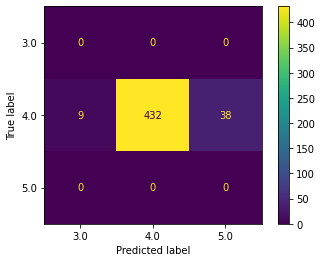

In [104]:
#confusion_matrix and classification_report
plot_confusion_matrix(clf_c, x_test, y_test)
print(classification_report(y_test, y_pred_te))

# RandomForestClassifier

In [113]:
#Applying RandomForestClassifier
clf_r=RandomForestClassifier(n_estimators=300,random_state=0)
clf_r.fit(x_train, y_train)
y_pred_trr=clf_r.predict(x_train)
y_pred_tee=clf_r.predict(x_test)
print("f1_score in training",f1_score(y_train, y_pred_trr,average=None))
print("f1_score in training by weighted",f1_score(y_train, y_pred_trr,average='weighted'))
print("accuracy in training",accuracy_score(y_train, y_pred_trr))
print("f1_score in testing",f1_score(y_test, y_pred_tee,average=None))
print("f1_score in testing by weighted",f1_score(y_test, y_pred_tee,average='weighted'))
print("accuracy in testing",accuracy_score(y_test, y_pred_tee))

f1_score in training [1.         0.92307692 0.98496241 0.99613402 0.98816568 1.        ]
f1_score in training by weighted 0.9927264584352737
accuracy in training 0.9926873857404022
f1_score in testing [0.         0.         0.93199554 0.        ]
f1_score in testing by weighted 0.9319955406911928
accuracy in testing 0.872651356993737


C:\Users\abdo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\abdo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abdo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abdo

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       1.00      0.87      0.93       479
         5.0       0.00      0.00      0.00         0

    accuracy                           0.87       479
   macro avg       0.25      0.22      0.23       479
weighted avg       1.00      0.87      0.93       479



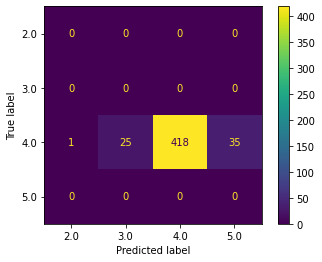

In [114]:
#confusion_matrix and classification_report
plot_confusion_matrix(clf_r, x_test, y_test)
print(classification_report(y_test, y_pred_tee))

In [99]:
#replace nan with mean value
#df_test_new['merchant_Percentage'].fillna((df_test_new['merchant_Percentage'].mean()), inplace=True)